#  Logistic Regression and Classification Error Metrics

### Professor: Rogério Martins Gomes

### Alunos: Aritana Noara Costa Santos  e Victor Augusto Januário da Cruz

## Introduction

We will be using the [Human Activity Recognition with Smartphones](https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones) database, which was built from the recordings of study participants performing activities of daily living (ADL) while carrying a smartphone with an embedded inertial sensors. The objective is to classify activities into one of the six activities (walking, walking upstairs, walking downstairs, sitting, standing, and laying) performed.

For each record in the dataset it is provided: 

- Triaxial acceleration from the accelerometer (total acceleration) and the estimated body acceleration. 
- Triaxial Angular velocity from the gyroscope. 
- A 561-feature vector with time and frequency domain variables. 
- Its activity label. 

More information about the features is available on the website: above or at https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones 

In [1]:
from __future__ import print_function
import os
#Data Path has to be set as per the file location in your system
#data_path = ['..', 'data']
data_path = ['data']

## Question 1

Import the data and do the following:

* Examine the data types--there are many columns, so it might be wise to use value counts
* Determine if the floating point values need to be scaled
* Determine the breakdown of each activity
* Encode the activity label as an integer

* Item 1: Importação dos dados. Os dados estão em formato csv e como as colunas de valores neste arquivo estão separadas por ',' (vírgula) se faz necessário informar isso ao fazer o a leitura destes dados. 

In [2]:
import pandas as pd
import numpy as np
#The filepath is dependent on the data_path set in the previous cell 

filepath = os.sep.join(data_path + ['Human_Activity_Recognition_Using_Smartphones_Data.csv'])

data = pd.read_csv(filepath, sep=',')

The data columns are all floats except for the activity label.

* Item 2: data.dtypes: Retorna o tipo de dados de cada coluna. O conjunto de dados possue 562 colunas, sendo 561 atributos e 1 categoria também chamada de target.

In [3]:
data.dtypes

tBodyAcc-mean()-X                       float64
tBodyAcc-mean()-Y                       float64
tBodyAcc-mean()-Z                       float64
tBodyAcc-std()-X                        float64
tBodyAcc-std()-Y                        float64
                                         ...   
angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
Length: 562, dtype: object

Item 3: data.dtypes.value_counts(): Retorna o tipo de dados de cada coluna. Todas colunas possuem tipo de dados 'float64' exceto a última cujo tipo é 'int64'

In [4]:
data.dtypes.value_counts()

float64    561
object       1
dtype: int64

Item 4: data.dtypes.tail(): Retorna as últimas (5) colunas e seus tipos de dados.

In [5]:
data.dtypes.tail()

angle(tBodyGyroJerkMean,gravityMean)    float64
angle(X,gravityMean)                    float64
angle(Y,gravityMean)                    float64
angle(Z,gravityMean)                    float64
Activity                                 object
dtype: object

The data are all scaled from -1 (minimum) to 1.0 (maximum).

Item 5: data.iloc[:, :-1]: Seleciona o conjunto de dados referente aos atributos.

In [6]:
data.iloc[:, :-1]

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,0.074472,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,0.101859,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.066249,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.046467,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563


Item 6: data.iloc[:, :-1].min(): Coleta o mínimo valor encontrada na coluna de cada atributo.

In [7]:
data.iloc[:, :-1].min()

tBodyAcc-mean()-X                      -1.0
tBodyAcc-mean()-Y                      -1.0
tBodyAcc-mean()-Z                      -1.0
tBodyAcc-std()-X                       -1.0
tBodyAcc-std()-Y                       -1.0
                                       ... 
angle(tBodyGyroMean,gravityMean)       -1.0
angle(tBodyGyroJerkMean,gravityMean)   -1.0
angle(X,gravityMean)                   -1.0
angle(Y,gravityMean)                   -1.0
angle(Z,gravityMean)                   -1.0
Length: 561, dtype: float64

Item 7: data.iloc[:, :-1].min().value_counts(): Conta o número de valores mínimos encontrados.

In [8]:
data.iloc[:, :-1].min().value_counts()

-1.0    561
dtype: int64

Foram encontrados 561 valores -1.0 que é o limite inferior do intervalo que os valores podem ter.

In [9]:
data.iloc[:, :-1].max().value_counts()

1.0    561
dtype: int64

Foram encontrados 561 valores 1.0 que é o limite superior do intervalo que os valores podem ter. Há portanto um balanceamento da quantidade de atributos que possuem valores máximos e mínimos.

Examine the breakdown of activities--they are relatively balanced.

Item 8: data.Activity.value_counts(): Exibe os valores que podem aparecer coluna de predição e a quantidade destes valores  na amostra.

In [10]:
data

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,STANDING
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10294,0.310155,-0.053391,-0.099109,-0.287866,-0.140589,-0.215088,-0.356083,-0.148775,-0.232057,0.185361,...,-0.376278,-0.750809,-0.337422,0.346295,0.884904,-0.698885,-0.651732,0.274627,0.184784,WALKING_UPSTAIRS
10295,0.363385,-0.039214,-0.105915,-0.305388,0.028148,-0.196373,-0.373540,-0.030036,-0.270237,0.185361,...,-0.320418,-0.700274,-0.736701,-0.372889,-0.657421,0.322549,-0.655181,0.273578,0.182412,WALKING_UPSTAIRS
10296,0.349966,0.030077,-0.115788,-0.329638,-0.042143,-0.250181,-0.388017,-0.133257,-0.347029,0.007471,...,-0.118854,-0.467179,-0.181560,0.088574,0.696663,0.363139,-0.655357,0.274479,0.181184,WALKING_UPSTAIRS
10297,0.237594,0.018467,-0.096499,-0.323114,-0.229775,-0.207574,-0.392380,-0.279610,-0.289477,0.007471,...,-0.205445,-0.617737,0.444558,-0.819188,0.929294,-0.008398,-0.659719,0.264782,0.187563,WALKING_UPSTAIRS


In [11]:
data.Activity.value_counts()

LAYING                1944
STANDING              1906
SITTING               1777
WALKING               1722
WALKING_UPSTAIRS      1544
WALKING_DOWNSTAIRS    1406
Name: Activity, dtype: int64

Scikit learn classifiers won't accept a sparse matrix for the prediction column. Thus, either `LabelEncoder` needs to be used to convert the activity labels to integers, or if `DictVectorizer` is used, the resulting matrix must be converted to a non-sparse array.  
Use `LabelEncoder` to fit_transform the "Activity" column, and look at 5 random values.

Item 7: 
 LabelEncoder(): Converte os 'target labels' para valores entre 0 e n_classes-1.
 le.fit_transform(data.Activity): A padronização dos dados é feito desta forma, mean normalization:
 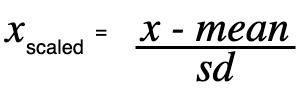
 
 A transfomação nas features usa a respectiva média e variança para cada ponto de data na feature.
 data['Activity'].sample(5): Mostra 5 amostras para avaliarmos.

In [12]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Activity'] = le.fit_transform(data.Activity)
data['Activity'].sample(5)

8774    0
3811    2
3715    0
4813    3
8868    5
Name: Activity, dtype: int64

## Question 2

* Calculate the correlations between the dependent variables.
* Create a histogram of the correlation values
* Identify those that are most correlated (either positively or negatively).

Item 1: feature_cols = data.columns[:-1]: Coleta os 'labels' das colunas.

corr_values = data[feature_cols].corr(): Computa a correlação entre as colunas, ou seja, como as variáveis estão relacionadas entre si. Isso nos dá uma ideia sobre o nível de relacionamento entre duas variáveis.

E então faz-se os tratamentos dos dados, como retirar dados vazios abaixo da diagonal, tornar os valores não usados como Not a Number, empilhar os dados e converter para um data frame para então pegar valores absolutos.

In [13]:
# Calculate the correlation values
feature_cols = data.columns[:-1]
corr_values = data[feature_cols].corr()

# Simplify by emptying all the data below the diagonal
tril_index = np.tril_indices_from(corr_values)

# Make the unused values NaNs
for coord in zip(*tril_index):
    corr_values.iloc[coord[0], coord[1]] = np.NaN
    
# Stack the data and convert to a data frame
corr_values = (corr_values.stack().to_frame().reset_index().rename(columns={'level_0':'feature1','level_1':'feature2',0:'correlation'}))

# Get the absolute values for sorting
corr_values['abs_correlation'] = corr_values.correlation.abs()

A histogram of the absolute value correlations.

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Item 2: O histograma é um tipo de gráfico de barras que demonstra uma distribuição de frequências. 
A base de cada uma das barras representa uma classe e a altura representa a quantidade ou frequência relativa 
com o que o valor de cada classe ocorre. E também pode ser utilizado como um indicador de dispersão de processos.

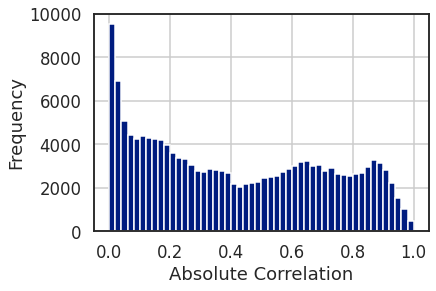

In [15]:
sns.set_context('talk')
sns.set_style('white')
sns.set_palette('dark')

ax = corr_values.abs_correlation.hist(bins=50)

ax.set(xlabel='Absolute Correlation', ylabel='Frequency');

Item 3: Análise do histograma anterior: O histograma é distorcido à direita, possue altos valores com baixa frequência, ou seja, a maior parte da concentração absoluta da correlação ocorre no início da distribuição.
Correlações próximas a 0 implica correlação fraca, próximas a 1, forte correlação.  
Verificar as features que estão mais correlacionadas ajuda a identificar a necessidade de eventuais ajustes no dataset, como lidar com características similares ou redundantes.

In [16]:
# The most highly correlated values
corr_values.sort_values('correlation', ascending=False).query('abs_correlation>0.8')

,feature1,feature2,correlation,abs_correlation
156894,fBodyBodyGyroJerkMag-mean(),fBodyBodyGyroJerkMag-sma(),1.000000,1.000000
93902,tBodyAccMag-sma(),tGravityAccMag-sma(),1.000000,1.000000
101139,tBodyAccJerkMag-mean(),tBodyAccJerkMag-sma(),1.000000,1.000000
96706,tGravityAccMag-mean(),tGravityAccMag-sma(),1.000000,1.000000
94257,tBodyAccMag-energy(),tGravityAccMag-energy(),1.000000,1.000000
...,...,...,...,...
22657,tGravityAcc-mean()-Y,"angle(Y,gravityMean)",-0.993425,0.993425
39225,"tGravityAcc-arCoeff()-Z,3","tGravityAcc-arCoeff()-Z,4",-0.994267,0.994267
38739,"tGravityAcc-arCoeff()-Z,2","tGravityAcc-arCoeff()-Z,3",-0.994628,0.994628
23176,tGravityAcc-mean()-Z,"angle(Z,gravityMean)",-0.994764,0.994764


## Question 3

* Split the data into train and test data sets. This can be done using any method, but consider using Scikit-learn's `StratifiedShuffleSplit` to maintain the same ratio of predictor classes.
* Regardless of methods used to split the data, compare the ratio of classes in both the train and test splits.


Item 1: 

StratifiedShuffleSplit: Providencia índices de treino e teste para dividir os dados em conjuntos de treinos e teste.

1) n_splits=1: consiste da quantidade de vezes que o dataset será embaralhado e particionado, para somente depois definir os grupos de teste e treino.

2) test_size=0.3: proporção do número de amostras que serão utilizadas no
treinamento. Empiricamente, algumas proporções de amostras de treino e
de teste são ideais para a obtenção de bons modelos (Ex.: 70%-30%, 80%-
20%, 75%-25%, respectivamente treino-teste)

3) random_state=42: um valor para iniciar o algoritmo de pseudoaleatoriedade.

4) Os conjuntos de treino e teste são construídos preservando a porcentagem
de amostras de cada classe ao particionar o dataset.

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit

# Get the split indexes
strat_shuf_split = StratifiedShuffleSplit(n_splits=1,test_size=0.3, random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(data[feature_cols], data.Activity))

# Create the dataframes
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'Activity']

X_test  = data.loc[test_idx, feature_cols]
y_test  = data.loc[test_idx, 'Activity']

 Item 2: y_train.value_counts: Retorna uma série contendo quantidades de valores únicos.
 normalize=True : Retorna a frequência relativa dividindo todos os valores pela soma dos valores.

In [18]:
y_train.value_counts(normalize=True)

0    0.188792
2    0.185046
1    0.172562
3    0.167152
5    0.149951
4    0.136496
Name: Activity, dtype: float64

In [19]:
y_test.value_counts(normalize=True)

0    0.188673
2    0.185113
1    0.172492
3    0.167314
5    0.149838
4    0.136570
Name: Activity, dtype: float64

## Question 4

* Fit a logistic regression model without any regularization using all of the features. Be sure to read the documentation about fitt ing a multi-class model so you understand the coefficient output. Store the model.

Item 1:
Para conseguir realizar a regressão linear sem a ‘regularization’, foi necessário adicionar o parâmetro penalty=‘none’, visto que,de acordo com a documentação, o default deste parâmetro é anorma l2.

O solver utilizado por padrão é o ‘lbfgs’. O parâmetro multi_class não foi especificado, e por padrão,
caso a biblioteca detecte que há mais de 2 classes nas saídas,ele utiliza multiclasses.

Como as classes são codificadas entre 0 e 5, o algoritmo utiliza a estratégia ‘um-vs-todos’: uma classe é tida como correta e as demais como incorretas.
from sklearn.linear_model import Logist

In [25]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regressio
lr = LogisticRegression(max_iter=1000,n_jobs=16, penalty='none').fit(X_train,y_train)
print(lr)

LogisticRegression(max_iter=1000, n_jobs=16, penalty='none')


## Question 5

Calculate the following error metric: 

* accuracy


In [27]:
# import the class
from sklearn.linear_model import LogisticRegression


# fit the model with data
lr.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)

In [28]:
# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[583,   0,   0,   0,   0,   0],
       [  1, 508,  23,   0,   0,   1],
       [  0,  28, 544,   0,   0,   0],
       [  0,   0,   0, 515,   2,   0],
       [  0,   0,   0,   1, 419,   2],
       [  0,   0,   0,   2,   1, 460]])

### Accuracy

In [31]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9802588996763754


Visualizing Confusion Matrix using Heatmap

Text(0.5, 257.44, 'Predicted label')

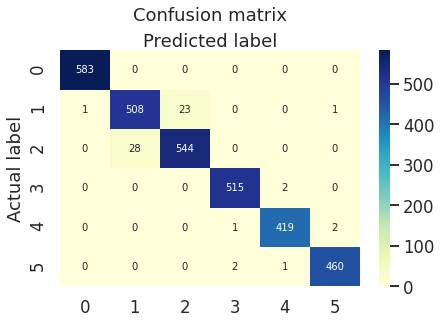

In [30]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')